# Data Analytics & Visualisation Final Project

Trends in Obesity and the Effectiveness of GLP-1 Agonists

In [58]:
import pandas as pd

file_path = 'WHO_Obesity_Rates_Per_Country.csv'

# Read the CSV file into a DataFrame
WHO_Obesity_Rates_Per_Country = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to verify
WHO_Obesity_Rates_Per_Country

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,ETH,Ethiopia,Year,2022,...,NaN,NaN,0.60,NaN,1.69,1.1 [0.6-1.7],NaN,NaN,EN,2024-02-29T00:00:00.000Z
1,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,SEAR,South-East Asia,Country,TLS,Timor-Leste,Year,2022,...,NaN,NaN,0.87,NaN,2.54,1.6 [0.9-2.5],NaN,NaN,EN,2024-02-29T00:00:00.000Z
2,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,RWA,Rwanda,Year,2022,...,NaN,NaN,1.16,NaN,2.56,1.8 [1.2-2.6],NaN,NaN,EN,2024-02-29T00:00:00.000Z
3,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,WPR,Western Pacific,Country,VNM,Viet Nam,Year,2022,...,NaN,NaN,1.26,NaN,2.77,1.9 [1.3-2.8],NaN,NaN,EN,2024-02-29T00:00:00.000Z
4,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,EMR,Eastern Mediterranean,Country,YEM,Yemen,Year,2022,...,NaN,NaN,6.01,NaN,15.78,10.1 [6.0-15.8],NaN,NaN,EN,2024-02-29T00:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19696,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,WPR,Western Pacific,Country,MNG,Mongolia,Year,1990,...,NaN,NaN,7.02,NaN,13.29,9.9 [7.0-13.3],NaN,NaN,EN,2024-02-29T00:00:00.000Z
19697,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,AFR,Africa,Country,DZA,Algeria,Year,1990,...,NaN,NaN,7.55,NaN,12.53,9.9 [7.5-12.5],NaN,NaN,EN,2024-02-29T00:00:00.000Z
19698,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,AMR,Americas,Country,CHL,Chile,Year,1990,...,NaN,NaN,7.64,NaN,12.50,9.9 [7.6-12.5],NaN,NaN,EN,2024-02-29T00:00:00.000Z
19699,NCD_BMI_30A,"Prevalence of obesity among adults, BMI &Great...",numeric,EUR,Europe,Country,NLD,Netherlands (Kingdom of the),Year,1990,...,NaN,NaN,8.30,NaN,11.62,9.9 [8.3-11.6],NaN,NaN,EN,2024-02-29T00:00:00.000Z


## Obesity Data Preprocessing

Multiple columns with NaN values, cleaning required using dropna.

In [59]:
# Importing necessary libraries
import pandas as pd

# Count the total number of NaN values in the entire DataFrame before cleaning
nan_count_before = WHO_Obesity_Rates_Per_Country.isnull().sum().sum()
print(f"\nTotal number of NaN values before cleaning: {nan_count_before}")

# Remove blank columns (columns where all values are NaN)
WHO_Obesity_Rates_Per_Country_Clean = WHO_Obesity_Rates_Per_Country.dropna(axis=1, how='all')

# Remove specific columns that are not required
columns_to_remove = ['IndicatorCode','Indicator','ValueType','ParentLocationCode','Location type','Period type','IsLatestYear','Dim2ValueCode','Dim3 type','Dim3','Language']
WHO_Obesity_Rates_Per_Country_Clean = WHO_Obesity_Rates_Per_Country_Clean.drop(columns=columns_to_remove, errors='ignore')

# Count the total number of NaN values in the cleaned DataFrame
nan_count_after = WHO_Obesity_Rates_Per_Country_Clean.isnull().sum().sum()
print(f"\nTotal number of NaN values after removing blank columns: {nan_count_after}")

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
WHO_Obesity_Rates_Per_Country_Clean



Total number of NaN values before cleaning: 216711

Total number of NaN values after removing blank columns: 0

Cleaned DataFrame:


,ParentLocation,SpatialDimValueCode,Location,Period,Dim1 type,Dim1,Dim1ValueCode,Dim2 type,Dim2,FactValueNumeric,FactValueNumericLow,FactValueNumericHigh,Value,DateModified
0,Africa,ETH,Ethiopia,2022,Sex,Male,SEX_MLE,Age Group,18+ years,1.06,0.60,1.69,1.1 [0.6-1.7],2024-02-29T00:00:00.000Z
1,South-East Asia,TLS,Timor-Leste,2022,Sex,Male,SEX_MLE,Age Group,18+ years,1.56,0.87,2.54,1.6 [0.9-2.5],2024-02-29T00:00:00.000Z
2,Africa,RWA,Rwanda,2022,Sex,Male,SEX_MLE,Age Group,18+ years,1.76,1.16,2.56,1.8 [1.2-2.6],2024-02-29T00:00:00.000Z
3,Western Pacific,VNM,Viet Nam,2022,Sex,Male,SEX_MLE,Age Group,18+ years,1.93,1.26,2.77,1.9 [1.3-2.8],2024-02-29T00:00:00.000Z
4,Eastern Mediterranean,YEM,Yemen,2022,Sex,Male,SEX_MLE,Age Group,18+ years,10.13,6.01,15.78,10.1 [6.0-15.8],2024-02-29T00:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19696,Western Pacific,MNG,Mongolia,1990,Sex,Female,SEX_FMLE,Age Group,18+ years,9.87,7.02,13.29,9.9 [7.0-13.3],2024-02-29T00:00:00.000Z
19697,Africa,DZA,Algeria,1990,Sex,Both sexes,SEX_BTSX,Age Group,18+ years,9.87,7.55,12.53,9.9 [7.5-12.5],2024-02-29T00:00:00.000Z
19698,Americas,CHL,Chile,1990,Sex,Male,SEX_MLE,Age Group,18+ years,9.94,7.64,12.50,9.9 [7.6-12.5],2024-02-29T00:00:00.000Z
19699,Europe,NLD,Netherlands (Kingdom of the),1990,Sex,Female,SEX_FMLE,Age Group,18+ years,9.88,8.30,11.62,9.9 [8.3-11.6],2024-02-29T00:00:00.000Z


In [60]:
# Group the DataFrame by 'ParentLocation' and perform necessary operations
grouped_by_parent_location = WHO_Obesity_Rates_Per_Country_Clean.groupby('ParentLocation')

# Example: Calculate the mean obesity rate for each ParentLocation
mean_obesity_by_parent = grouped_by_parent_location['FactValueNumeric'].mean()

# Display the results
print("\nMean Obesity Rate by Parent Location:")
mean_obesity_by_parent


Mean Obesity Rate by Parent Location:


ParentLocation
Africa                    7.718459
Americas                 21.567731
Eastern Mediterranean    22.035657
Europe                   17.633498
South-East Asia           4.643508
Western Pacific          29.219844
Name: FactValueNumeric, dtype: float64

## GLP-1 Inhibitor Data Preprocessing

In [61]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the article 
url = 'https://www.nature.com/articles/s41366-024-01473-y/tables/2'

# Send a GET request to fetch the page content
response = requests.get(url)
response.raise_for_status()

# Parse the page content with BeautifulSoup
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table by its caption or other identifying feature
table = soup.find('table')
if table:
    headers = [header.get_text(strip=True) for header in table.find_all('th')]
else:
    print("Table not found!")

# Extract table headers
headers = [header.get_text(strip=True) for header in table.find_all('th')]

# Extract table rows
rows = []
for row in table.find_all('tr')[1:]: 
    cells = row.find_all(['td', 'th'])
    row_data = [cell.get_text(strip=True) for cell in cells]
    rows.append(row_data)

# Create a DataFrame
df_Weight_loss_outcomes = pd.DataFrame(rows, columns=headers)

# Display the DataFrame
print(df_Weight_loss_outcomes)


                                      Medication Semaglutide [21] 50 mgA  \
0                            Route and frequency                  PO, OD   
1                                     Comparator                 vs. plb   
2                                            MoA                   GLP-1   
3                                    Trial phase                       3   
4                         Trial duration (weeks)                      68   
5                                   Participants             334 vs. 333   
6                              Efficacy outcomes                    None   
7                                         WL (%)         −17.4% vs. 1.8%   
8                                         ≥5% WL             89% vs. 24%   
9                                        ≥10% WL             75% vs. 12%   
10                                       ≥15% WL              58% vs. 5%   
11                                       ≥20% WL              37% vs. 2%   
12          

In [62]:
import pandas as pd
import re

# Transpose the DataFrame to swap rows and columns
df_cleaned = df_Weight_loss_outcomes.transpose()

# Rename the columns to make the first row the header
df_cleaned.columns = df_cleaned.iloc[0]
df_cleaned = df_cleaned[1:].reset_index()

# Rename the first column to 'Medication'
df_cleaned.rename(columns={'index': 'Medication'}, inplace=True)

# Clean the 'Medication' column: keep only the first word of each medication name
df_cleaned['Medication'] = df_cleaned['Medication'].str.split().str[0]

# Rename 'Mazdutide*' to 'Maxdutide 9mg' and remove the asterisk from 'Survodutide*'
df_cleaned.loc[df_cleaned['Medication'] == 'Mazdutide*', 'Medication'] = 'Maxdutide 9mg'
df_cleaned.loc[df_cleaned['Medication'] == 'Survodutide*', 'Medication'] = 'Survodutide'

# Remove unnecessary columns: 1,2,3,4,5,6,7 and 13-25
columns_to_remove = [1, 2, 3, 4, 5, 6, 7] + list(range(13, 26))
df_cleaned.drop(df_cleaned.columns[columns_to_remove], axis=1, inplace=True)

import re

def clean_weight_loss(entry, unit='%'):
    """
    Cleans and extracts Min, Max, and Control values from weight loss data entries.
    """
    if pd.isna(entry) or entry.strip().upper() == "NA":  # Handle missing or NA values
        return None, None, None

    # Normalize spaces and special characters
    entry = re.sub(r'\u00A0| ', ' ', entry)  # Replace non-breaking spaces
    entry = entry.replace("−", "-")  # Replace special dash with standard dash

    # Initialize placeholders for Min, Max, and Control
    min_loss, max_loss, control_loss = None, None, None

    # Handle ranges and single values
    if unit == '%':
        range_match = re.search(r'([-+]?\d+\.?\d*)\s*(?:to|–)\s*([-+]?\d+\.?\d*)\s*%', entry)
        single_value_match = re.search(r'([-+]?\d+\.?\d*)\s*%', entry)
        control_match = re.search(r'vs\..*?([-+]?\d+\.?\d*)\s*%', entry)
        multi_control_match = re.findall(r'\(.*?([-+]?\d+\.?\d*)\s*%', entry)

    # Extract Min and Max values
    if range_match:
        min_loss = abs(float(range_match.group(1)))  # Convert Min to positive
        max_loss = abs(float(range_match.group(2)))  # Convert Max to positive
    elif single_value_match:
        max_loss = abs(float(single_value_match.group(1)))  # Convert to positive
        min_loss = max_loss  # Min = Max for single values

    # Extract Control value(s)
    if multi_control_match:  # Handle multiple controls
        control_loss = sum([abs(float(value)) for value in multi_control_match]) / len(multi_control_match)  # Average
    elif control_match:
        control_loss = abs(float(control_match.group(1)))  # Single control value

    return min_loss, max_loss, control_loss

# Columns that require cleaning and their respective units
columns_to_clean = {
    'WL (%)': '%',
    '≥5% WL': '%',
    '≥10% WL': '%',
    '≥15% WL': '%',
    '≥20% WL': '%',
}

# Iterate over each column and clean its data
for col, unit in columns_to_clean.items():
    # Create three new columns for min, max, and control group
    df_cleaned[[f"{col} Min", f"{col} Max", f"{col} Control"]] = df_cleaned[col].apply(
        lambda x: pd.Series(clean_weight_loss(x, unit))
    )

# Drop the original columns as they are now split into min, max, and control
df_cleaned.drop(columns=columns_to_clean.keys(), inplace=True)

# Reset the index for clean output
df_cleaned.reset_index(drop=True, inplace=True)

# Display the cleaned DataFrame
print(df_cleaned)

Medication      Medication  WL (%) Min  WL (%) Max  WL (%) Control  \
0              Semaglutide        17.4        17.4            1.80   
1              Tirzepatide        16.0        16.0            2.40   
2             Orforglipron         9.4         9.4            2.30   
3             Cagrilintide         6.0         6.0            6.00   
4              Survodutide         6.8         6.8            2.00   
5           Efinopegdutide         8.5         8.5            4.65   
6                Mazdutide         6.7         6.7            1.00   
7            Maxdutide 9mg        15.4        15.4             NaN   
8              Pemvidutide        10.3        10.3            2.20   
9              Retatrutide         8.7         8.7            2.10   
10               CagriSema         8.3         8.3            9.50   

Medication  ≥5% WL Min  ≥5% WL Max  ≥5% WL Control  ≥10% WL Min  ≥10% WL Max  \
0                 89.0        89.0            24.0         75.0         75.0   

In [63]:
# Generate summary statistics for the cleaned DataFrame
summary_statistics = df_cleaned.describe()

# Display the summary statistics
print("\nSummary Statistics:")
print(summary_statistics)



Summary Statistics:
Medication  WL (%) Min  WL (%) Max  WL (%) Control  ≥5% WL Min  ≥5% WL Max  \
count        11.000000   11.000000       10.000000   10.000000   10.000000   
mean         10.318182   10.318182        3.395000   71.800000   87.500000   
std           4.040005    4.040005        2.606663   13.281566    6.900081   
min           6.000000    6.000000        1.000000   54.000000   80.000000   
25%           7.550000    7.550000        2.025000   59.500000   82.250000   
50%           8.700000    8.700000        2.250000   70.500000   86.500000   
75%          12.850000   12.850000        4.087500   82.750000   91.250000   
max          17.400000   17.400000        9.500000   89.000000  100.000000   

Medication  ≥5% WL Control  ≥10% WL Min  ≥10% WL Max  ≥10% WL Control  \
count             10.00000    10.000000    10.000000        10.000000   
mean              24.43000    46.900000    68.300000         9.750000   
std               14.55656    22.590313    16.646988     

# Preliminary Analysis

In [64]:
import pandas as pd
import plotly.express as px

# Filter for 'Both sexes'
df_filtered = WHO_Obesity_Rates_Per_Country_Clean[WHO_Obesity_Rates_Per_Country_Clean['Dim1'] == 'Both sexes']

# Create a choropleth map with a slider for years
fig = px.choropleth(
    df_filtered.sort_values('Period', ascending=True),
    locations='Location',
    locationmode='country names',
    color='FactValueNumeric',
    hover_name='Location',
    animation_frame='Period',
    title='Global Obesity Rates Per Country (2022-1990)',
    color_continuous_scale='Blues',
    labels={'FactValueNumeric': 'Obesity Rate (%)'}
)

# Show the map
fig.show()


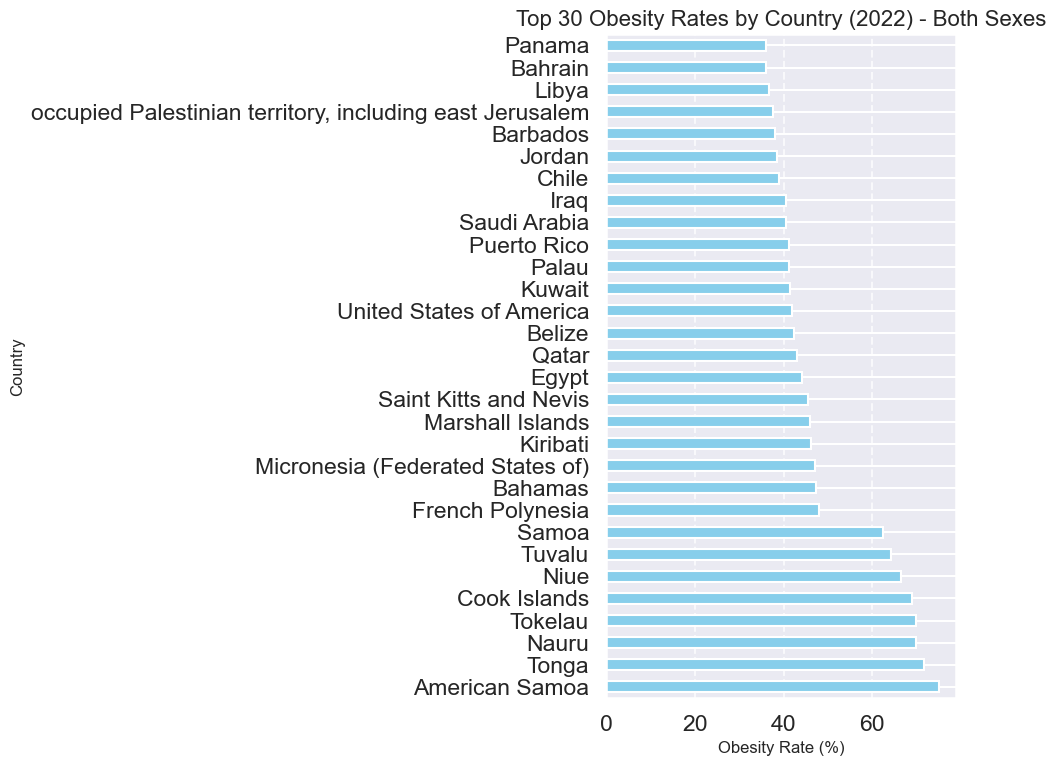

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtering the DataFrame for entries from 2022 and 'Both sexes' in 'Dim1'
df_2022_both_sexes = WHO_Obesity_Rates_Per_Country_Clean[
    (WHO_Obesity_Rates_Per_Country_Clean['Period'] == 2022) & 
    (WHO_Obesity_Rates_Per_Country_Clean['Dim1'] == 'Both sexes')
]

# Group by country and get the obesity rates from 'FactValueNumeric' column
obesity_rates = df_2022_both_sexes.groupby('Location')['FactValueNumeric'].mean().sort_values(ascending=False)

# Select the top 30 countries
top_30_countries = obesity_rates.head(30)

# Plot Data
plt.figure(figsize=(10, 8))
top_30_countries.plot(kind='barh', color='skyblue')
plt.title('Top 30 Obesity Rates by Country (2022) - Both Sexes', fontsize=16)
plt.xlabel('Obesity Rate (%)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

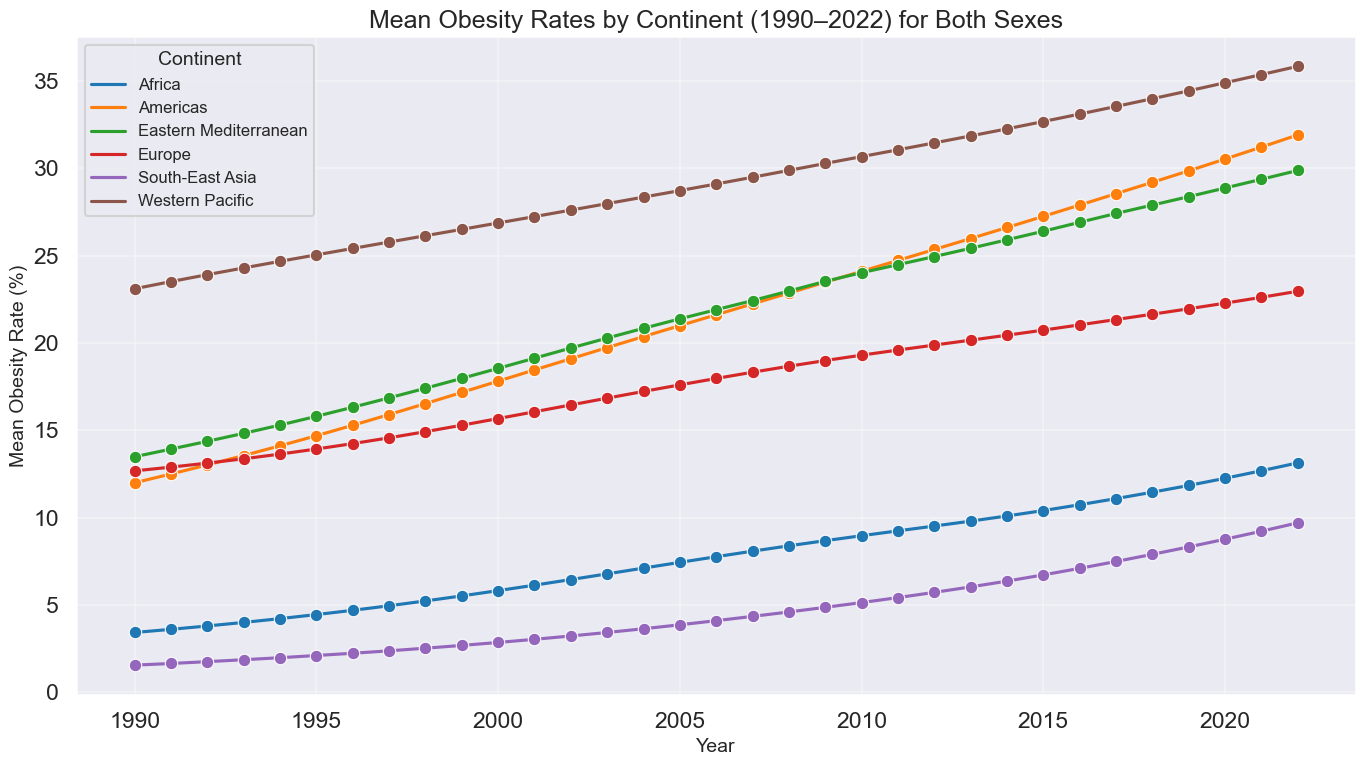

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style and aesthetics using sns.set()
sns.set(context="talk", palette="tab10")

# Filter the dataset for valid years between 1990 and 2022 and entries for 'Both sexes' in the correct column
df_filtered = WHO_Obesity_Rates_Per_Country_Clean[
    (WHO_Obesity_Rates_Per_Country_Clean['Period'] >= 1990) &
    (WHO_Obesity_Rates_Per_Country_Clean['Period'] <= 2022) &
    (WHO_Obesity_Rates_Per_Country_Clean['Dim1'] == 'Both sexes')
]

# Group the dataset by 'ParentLocation' and 'Period' to calculate the mean obesity rates
continent_period_means = df_filtered.groupby(['ParentLocation', 'Period'])['FactValueNumeric'].mean().reset_index()

# Plot the mean obesity rates for each ParentLocation (e.g., continents) over time using seaborn lineplot
plt.figure(figsize=(14, 8))
sns.lineplot(
    data=continent_period_means,
    x='Period',
    y='FactValueNumeric',
    hue='ParentLocation',
    marker='o'
)

# Add titles and labels
plt.title('Mean Obesity Rates by Continent (1990–2022) for Both Sexes', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Obesity Rate (%)', fontsize=14)
plt.legend(title='Continent', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

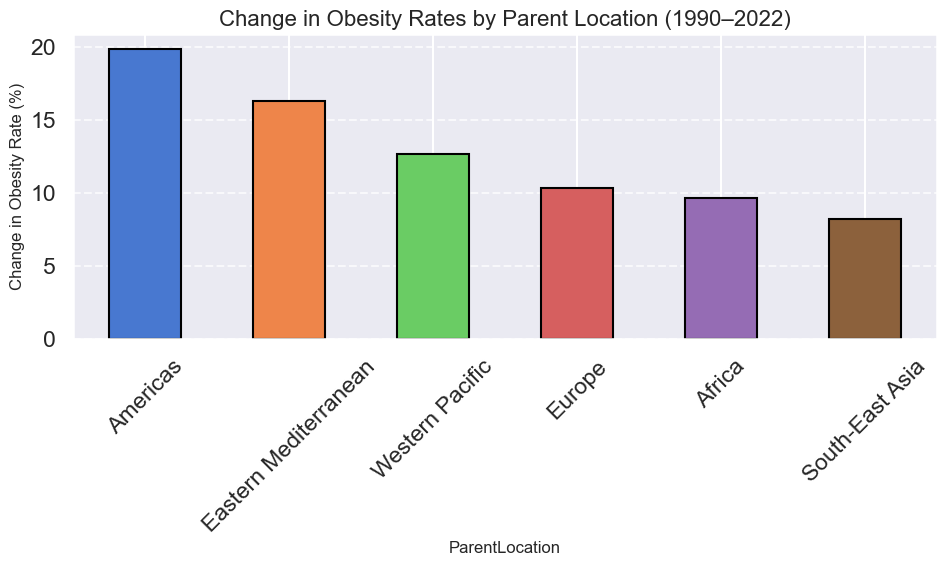

The ParentLocation with the most significant increase is Americas with a change of 19.88%.


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for 1990 and 2022 only
df_1990_2022 = WHO_Obesity_Rates_Per_Country_Clean[
    WHO_Obesity_Rates_Per_Country_Clean['Period'].isin([1990, 2022])
]

# Group by 'Period' and 'ParentLocation', and calculate mean obesity rates
parent_location_means = df_1990_2022.groupby(['Period', 'ParentLocation'])['FactValueNumeric'].mean().reset_index()

# Pivot the data for easier comparison
pivot_table = parent_location_means.pivot(index='ParentLocation', columns='Period', values='FactValueNumeric')

# Calculate the absolute change between 1990 and 2022
pivot_table['Change'] = pivot_table[2022] - pivot_table[1990]

# Use a more muted color palette for the bars
colors = sns.color_palette("muted", len(pivot_table))

# Plot the changes as a bar chart
plt.figure(figsize=(10, 6))
pivot_table['Change'].sort_values(ascending=False).plot(
    kind='bar', 
    color=colors, 
    edgecolor='black'
)
plt.title('Change in Obesity Rates by Parent Location (1990–2022)', fontsize=16)
plt.xlabel('ParentLocation', fontsize=12)
plt.ylabel('Change in Obesity Rate (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Highlight ParentLocation with the most significant increase
most_significant = pivot_table['Change'].idxmax()
most_significant_increase = pivot_table['Change'].max()
print(f"The ParentLocation with the most significant increase is {most_significant} with a change of {most_significant_increase:.2f}%.")

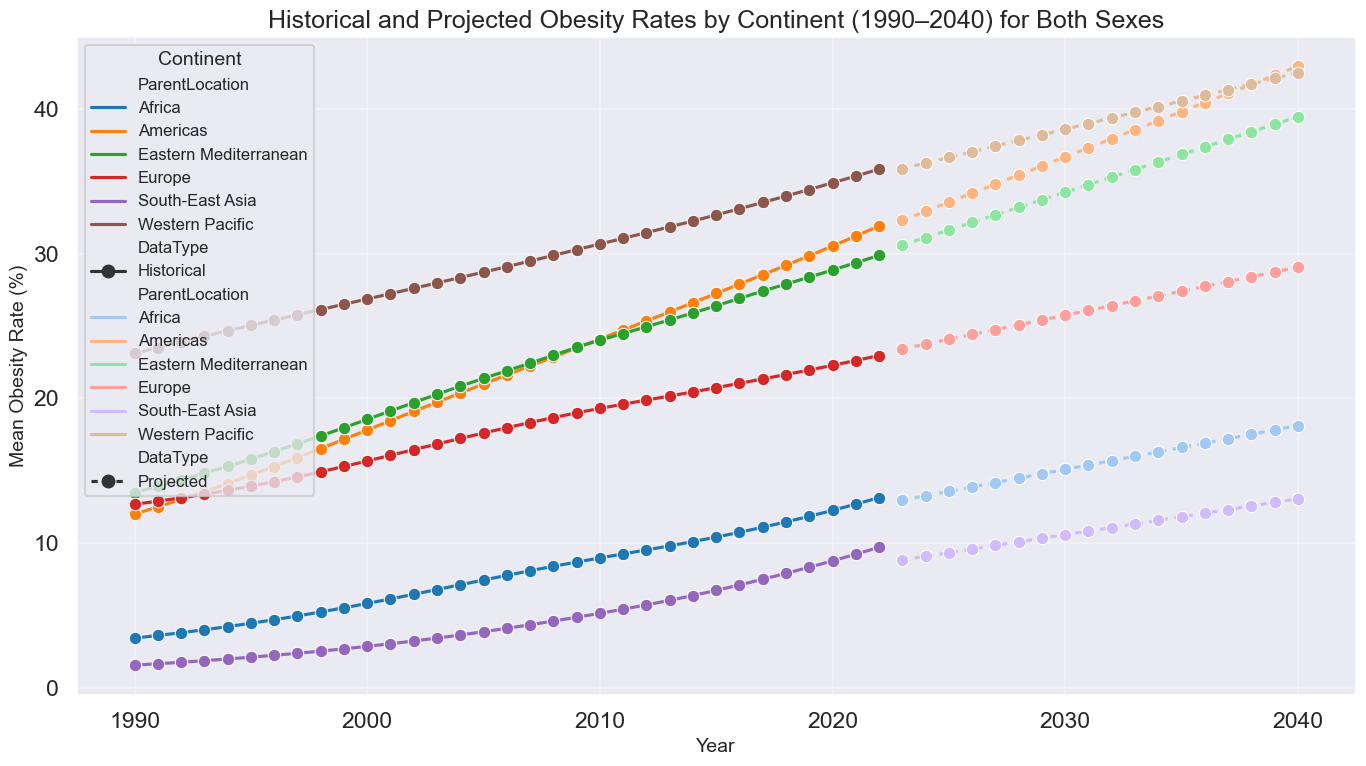

In [68]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'WHO_Obesity_Rates_Per_Country.csv' 
WHO_Obesity_Rates_Per_Country = pd.read_csv(file_path)

# Preprocess the dataset
# Remove columns that are not required
columns_to_remove = ['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode', 'Location type',
                     'Period type', 'IsLatestYear', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Language']
WHO_Obesity_Rates_Per_Country_Clean = WHO_Obesity_Rates_Per_Country.drop(columns=columns_to_remove, errors='ignore')

# Remove blank columns (columns where all values are NaN)
WHO_Obesity_Rates_Per_Country_Clean = WHO_Obesity_Rates_Per_Country_Clean.dropna(axis=1, how='all')

# Filter for entries with 'Both sexes' in 'Dim1' and valid years between 1990 and 2022
df_filtered = WHO_Obesity_Rates_Per_Country_Clean[
    (WHO_Obesity_Rates_Per_Country_Clean['Period'] >= 1990) &
    (WHO_Obesity_Rates_Per_Country_Clean['Period'] <= 2022) &
    (WHO_Obesity_Rates_Per_Country_Clean['Dim1'] == 'Both sexes')
].copy()

# Ensure 'Period' and 'FactValueNumeric' are numeric
df_filtered.loc[:, 'Period'] = pd.to_numeric(df_filtered['Period'], errors='coerce')
df_filtered.loc[:, 'FactValueNumeric'] = pd.to_numeric(df_filtered['FactValueNumeric'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df_filtered = df_filtered.dropna(subset=['Period', 'FactValueNumeric'])

# Group by 'ParentLocation' and 'Period' to calculate the mean obesity rates
continent_period_means = df_filtered.groupby(['ParentLocation', 'Period'])['FactValueNumeric'].mean().reset_index()

# Initialize a Linear Regression model
model = LinearRegression()

# Prepare a DataFrame to store projections
projection_results = []

# Loop through each ParentLocation to calculate projections
for continent in continent_period_means['ParentLocation'].unique():
    
    # Filter data for the current continent
    continent_data = continent_period_means[continent_period_means['ParentLocation'] == continent]
    
    # Prepare data for regression
    X = continent_data['Period'].values.reshape(-1, 1)  # Feature (Years)
    y = continent_data['FactValueNumeric'].values  # Target (Obesity Rates)
    
    # Check if there is sufficient data for regression
    if len(X) > 1:
        # Fit the model
        model.fit(X, y)
        
        # Predict obesity rates from 2023 to 2040
        future_years = np.arange(2023, 2041).reshape(-1, 1)
        predictions = model.predict(future_years)
        
        # Store the results
        projection_results.extend(
            [{'ParentLocation': continent, 'Period': year, 'FactValueNumeric': pred} 
             for year, pred in zip(future_years.ravel(), predictions)]
        )

# Convert projection results into a DataFrame
projections_df = pd.DataFrame(projection_results)

# Add a column to indicate whether the data is historical or projected
continent_period_means['DataType'] = 'Historical'
projections_df['DataType'] = 'Projected'

# Combine historical data and projections
combined_df = pd.concat([continent_period_means, projections_df])

# Plot the historical and projected obesity rates for each continent
plt.figure(figsize=(14, 8))

# Use seaborn to plot the historical data
sns.lineplot(
    data=combined_df[combined_df['DataType'] == 'Historical'],
    x='Period',
    y='FactValueNumeric',
    hue='ParentLocation',
    style='DataType',
    markers=True,
    dashes=False,
    palette="tab10",
)

# Use seaborn to plot the projected data with a lighter shade
sns.lineplot(
    data=combined_df[combined_df['DataType'] == 'Projected'],
    x='Period',
    y='FactValueNumeric',
    hue='ParentLocation',
    style='DataType',
    markers=True,
    dashes=[(2, 2)],
    palette="pastel",
)

# Add titles and labels
plt.title('Historical and Projected Obesity Rates by Continent (1990–2040) for Both Sexes', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Mean Obesity Rate (%)', fontsize=14)
plt.legend(title='Continent', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

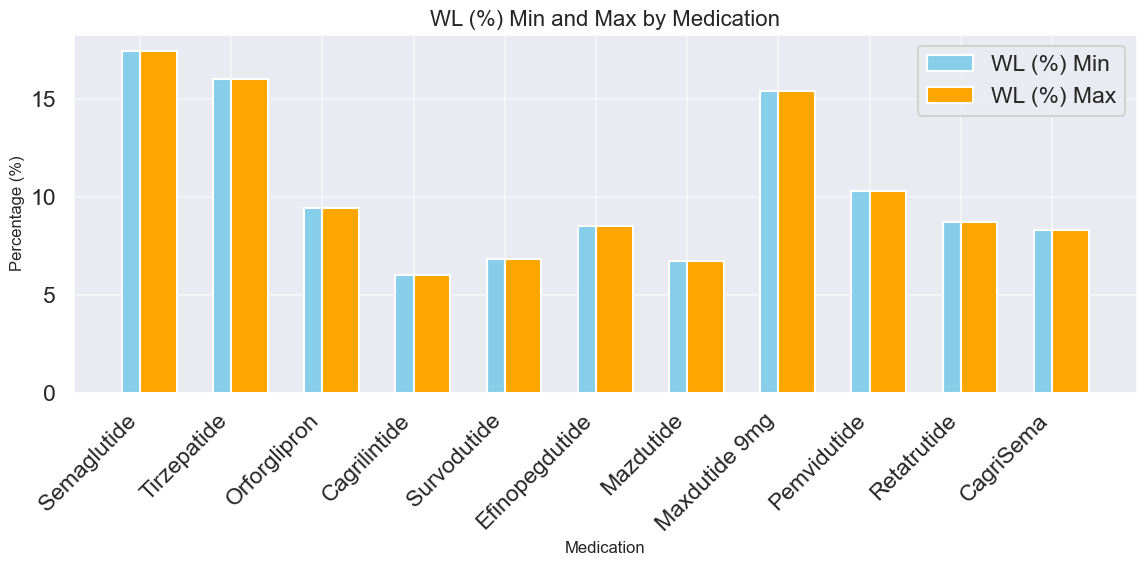

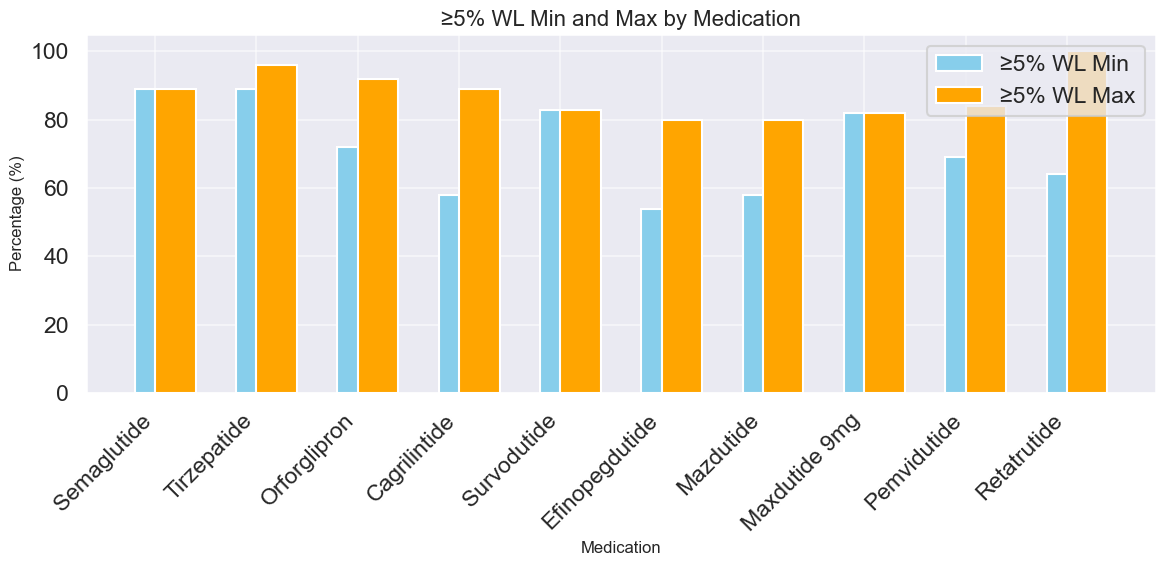

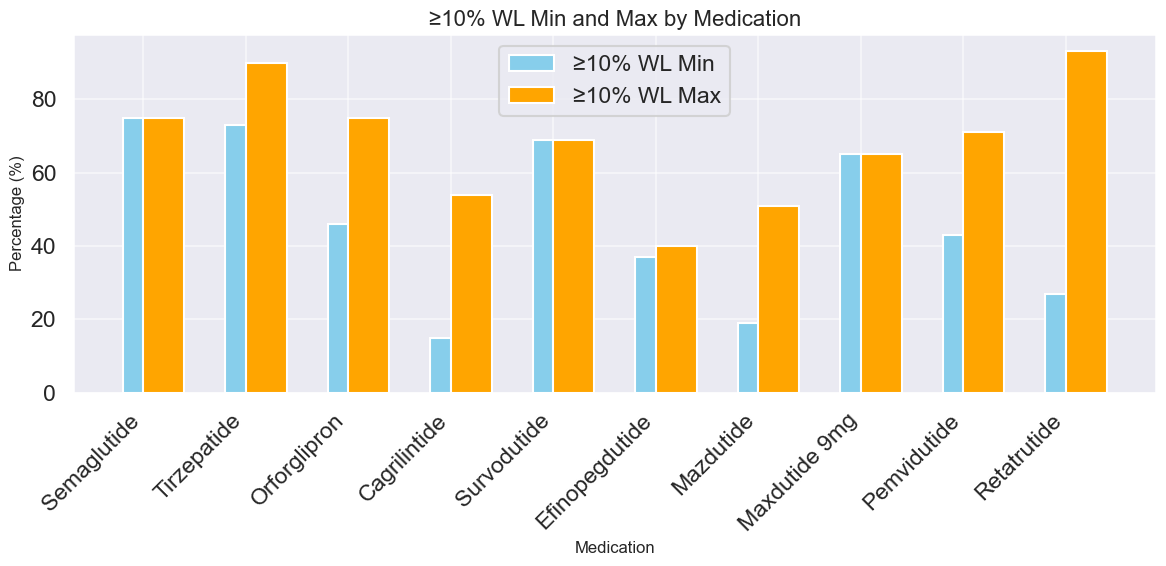

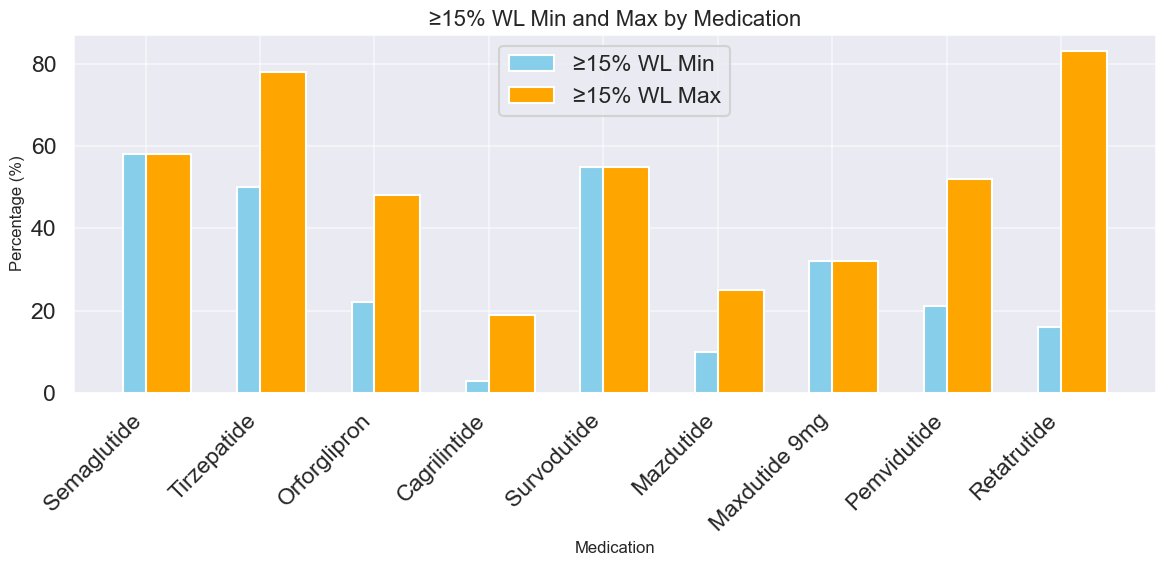

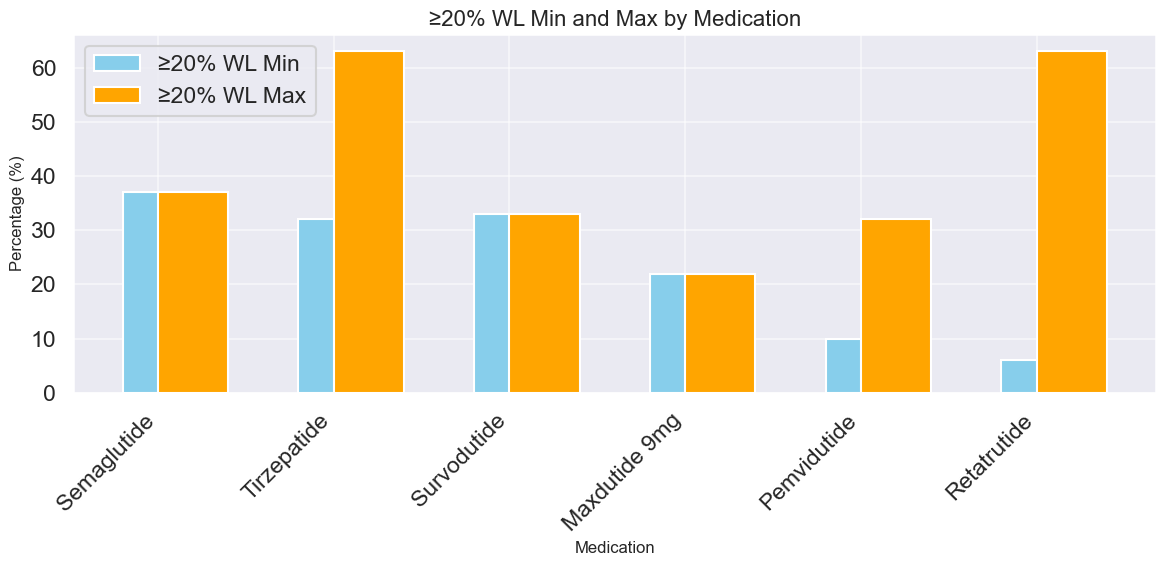

In [69]:
import matplotlib.pyplot as plt

metrics = ['WL (%)', '≥5% WL', '≥10% WL', '≥15% WL', '≥20% WL']

# Loop through each metric to create separate charts
for metric in metrics:
    # Prepare the data for the current metric
    metric_data = df_cleaned[['Medication', f'{metric} Min', f'{metric} Max']].dropna()
    
    # Plot the Min and Max values for the current metric
    plt.figure(figsize=(12, 6))
    x = metric_data['Medication']
    y_min = metric_data[f'{metric} Min']
    y_max = metric_data[f'{metric} Max']
    
    # Create a bar chart showing Min and Max side by side
    bar_width = 0.4
    x_indexes = range(len(x))
    
    plt.bar(x_indexes, y_min, width=bar_width, label=f'{metric} Min', align='center', color='skyblue')
    plt.bar(x_indexes, y_max, width=bar_width, label=f'{metric} Max', align='edge', color='orange')
    
    # Add titles, labels, and grid
    plt.title(f'{metric} Min and Max by Medication', fontsize=16)
    plt.xlabel('Medication', fontsize=12)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.xticks(ticks=x_indexes, labels=x, rotation=45, ha='right')
    plt.legend()
    plt.tight_layout()
    plt.grid(alpha=0.5)
    plt.show()

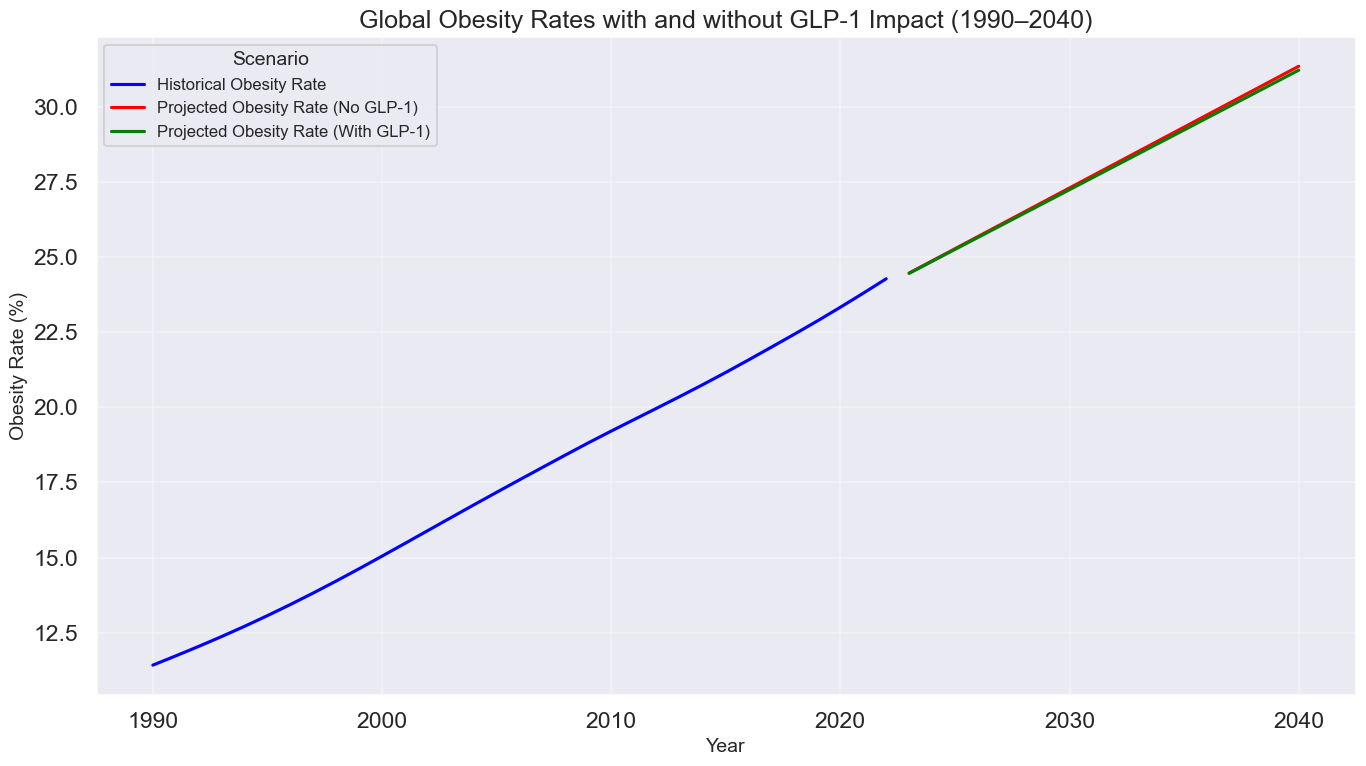

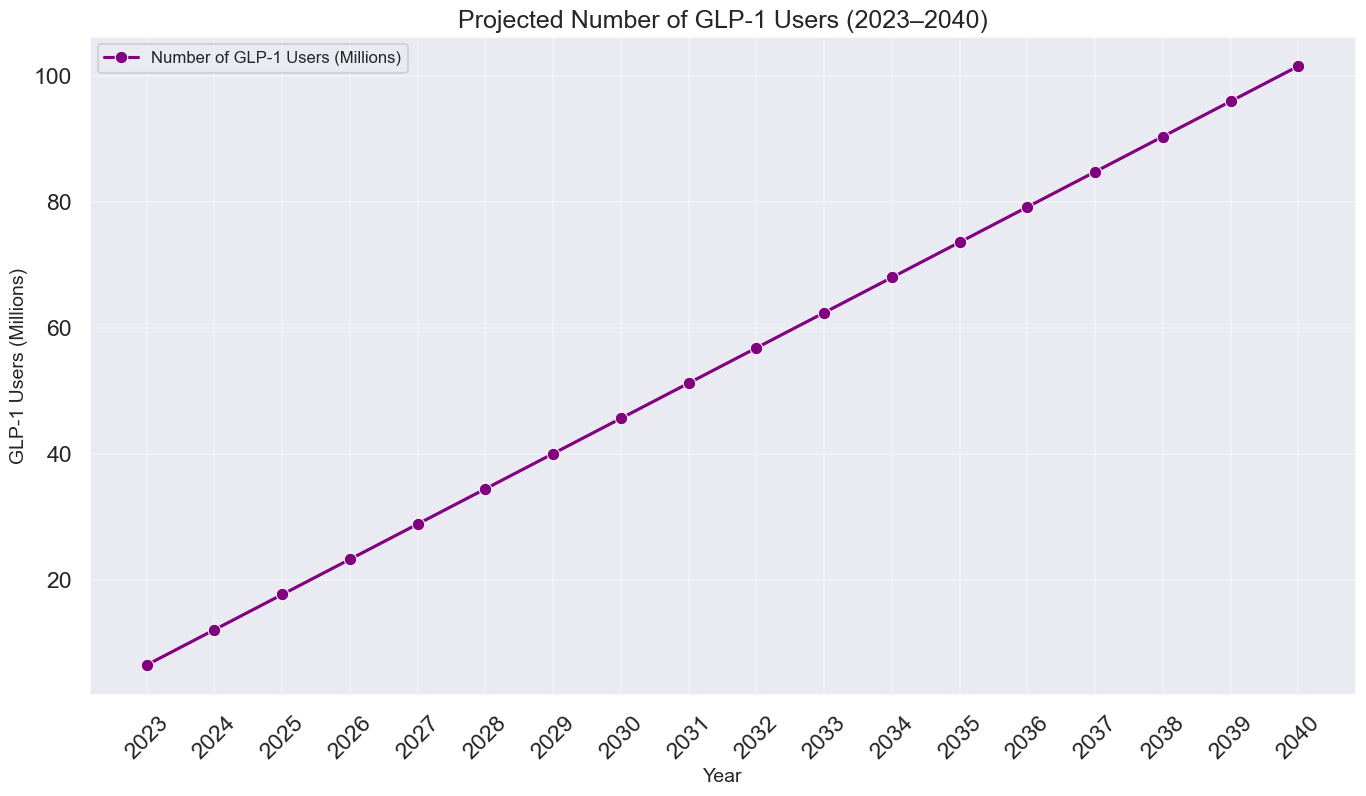

Projected Obesity Rate in 2040 without GLP-1 impact: 31.36%
Projected Obesity Rate in 2040 with GLP-1 impact: 31.23%


In [70]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'WHO_Obesity_Rates_Per_Country.csv'
WHO_Obesity_Rates_Per_Country = pd.read_csv(file_path)

# Preprocess the dataset
columns_to_remove = ['IndicatorCode', 'Indicator', 'ValueType', 'ParentLocationCode', 'Location type',
                     'Period type', 'IsLatestYear', 'Dim2ValueCode', 'Dim3 type', 'Dim3', 'Language']
WHO_Obesity_Rates_Per_Country_Clean = WHO_Obesity_Rates_Per_Country.drop(columns=columns_to_remove, errors='ignore')
WHO_Obesity_Rates_Per_Country_Clean = WHO_Obesity_Rates_Per_Country_Clean.dropna(axis=1, how='all')

# Filter for entries with 'Both sexes' in 'Dim1' and valid years between 1990 and 2022
df_filtered = WHO_Obesity_Rates_Per_Country_Clean[
    (WHO_Obesity_Rates_Per_Country_Clean['Period'] >= 1990) &
    (WHO_Obesity_Rates_Per_Country_Clean['Period'] <= 2022) &
    (WHO_Obesity_Rates_Per_Country_Clean['Dim1'] == 'Both sexes')
].copy()

# Ensure 'Period' and 'FactValueNumeric' are numeric
df_filtered.loc[:, 'Period'] = pd.to_numeric(df_filtered['Period'], errors='coerce')
df_filtered.loc[:, 'FactValueNumeric'] = pd.to_numeric(df_filtered['FactValueNumeric'], errors='coerce')

# Drop rows with NaN values in the relevant columns
df_filtered = df_filtered.dropna(subset=['Period', 'FactValueNumeric'])

# Group by 'Period' to calculate global mean obesity rates
global_period_means = df_filtered.groupby('Period')['FactValueNumeric'].mean().reset_index()

# Initialize a Linear Regression model
model = LinearRegression()

# Prepare data for regression
X = global_period_means['Period'].values.reshape(-1, 1)  # Feature (Years)
y = global_period_means['FactValueNumeric'].values  # Target (Obesity Rates)

# Fit the model
model.fit(X, y)

# Predict obesity rates from 2023 to 2040 without GLP-1 usage
future_years = np.arange(2023, 2041).reshape(-1, 1)
predictions_no_glp1 = model.predict(future_years)

# GLP-1 usage projection
initial_users = 837000
target_users_2029 = 40000000
population = 8025000000  # Global population (constant over the years)
weight_loss_per_person = 10.318182  # Mean percentage weight loss from GLP-1 inhibitors

# Project the number of GLP-1 users from 2023 to 2040
years = np.arange(2023, 2041)
glp1_users = np.piecewise(
    years,
    [years <= 2029, years > 2029],
    [lambda x: initial_users + ((target_users_2029 - initial_users) / (2029 - 2022)) * (x - 2022),
     lambda x: target_users_2029 + ((target_users_2029 - initial_users) / (2029 - 2022)) * (x - 2029)]
)

# Calculate the percentage of the population using GLP-1 inhibitors
glp1_percentage = glp1_users / population

# Calculate obesity reduction due to GLP-1 usage
obesity_reduction = glp1_percentage * weight_loss_per_person

# Adjust the predicted obesity rates based on GLP-1 impact
predictions_with_glp1 = predictions_no_glp1 - obesity_reduction

# Combine historical and projected data
projection_df = pd.DataFrame({
    'Period': years,
    'ObesityRate_No_GLP1': predictions_no_glp1,
    'ObesityRate_With_GLP1': predictions_with_glp1,
    'GLP1_Users': glp1_users
})
combined_df = pd.concat([global_period_means, projection_df], ignore_index=True)

# Plot the results for obesity rates
plt.figure(figsize=(14, 8))

# Plot historical data
sns.lineplot(
    data=combined_df[combined_df['Period'] <= 2022],
    x='Period',
    y='FactValueNumeric',
    label='Historical Obesity Rate',
    color='blue'
)

# Plot projected data without GLP-1
sns.lineplot(
    data=projection_df,
    x='Period',
    y='ObesityRate_No_GLP1',
    label='Projected Obesity Rate (No GLP-1)',
    color='red'
)

# Plot projected data with GLP-1
sns.lineplot(
    data=projection_df,
    x='Period',
    y='ObesityRate_With_GLP1',
    label='Projected Obesity Rate (With GLP-1)',
    color='green'
)

# Add titles and labels
plt.title('Global Obesity Rates with and without GLP-1 Impact (1990–2040)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Obesity Rate (%)', fontsize=14)
plt.legend(title='Scenario', fontsize=12, title_fontsize=14, loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot the number of GLP-1 users
plt.figure(figsize=(14, 8))
sns.lineplot(
    x=years,
    y=glp1_users / 1e6,  
    color='purple',
    marker='o',
    label='Number of GLP-1 Users (Millions)'
)

# Add titles and labels
plt.title('Projected Number of GLP-1 Users (2023–2040)', fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('GLP-1 Users (Millions)', fontsize=14)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.legend(fontsize=12, title_fontsize=14)

# Format the x-axis ticks as integers
plt.xticks(ticks=years, labels=years, rotation=45)

plt.show()

# Print the results
print(f"Projected Obesity Rate in 2040 without GLP-1 impact: {predictions_no_glp1[-1]:.2f}%")
print(f"Projected Obesity Rate in 2040 with GLP-1 impact: {predictions_with_glp1[-1]:.2f}%")

In [72]:
import dash
from dash import dcc, html
from dash.dependencies import Input, Output
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

# Initialize the app
app = dash.Dash(__name__)

# Choropleth Chart
def create_choropleth(data, year):
    # Check if dataset is empty or missing required columns
    if data.empty or 'Period' not in data.columns or 'Location' not in data.columns:
        return go.Figure().update_layout(title=f"No data available for {year}")
    df_year = data[data['Period'] == year]
    if df_year.empty:
        return go.Figure().update_layout(title=f"No data available for {year}")
    fig = px.choropleth(
        df_year.sort_values('Period', ascending=True),
        locations='Location',
        locationmode='country names',
        color='FactValueNumeric',
        hover_name='Location',
        title=f'Choropleth Map of Global Obesity Rates Per Country ({year})',
        color_continuous_scale='Blues',
        labels={'FactValueNumeric': 'Obesity Rate (%)'}
    )
    return fig


# Top 30 Countries Bar Chart
def create_top_30_chart(data, year):
    # Filter for the selected year
    df_year = data[data['Period'] == year].copy()
    if df_year.empty:
        return go.Figure().update_layout(title=f"No data available for {year}")
    obesity_rates = df_year.groupby('Location')['FactValueNumeric'].mean().sort_values(ascending=False).reset_index()
    top_30_countries = obesity_rates.head(30)
    # Create the bar chart
    fig = px.bar(
        top_30_countries,
        x='FactValueNumeric',
        y='Location',
        orientation='h',
        title=f'Highest 30 Obesity Rates by Country ({year})',
        labels={'FactValueNumeric': 'Obesity Rate (%)', 'Location': 'Country'}
    )
    fig.update_layout(
        height=800,  
        width=600,
        margin=dict(l=100, r=20, t=50, b=50),
        yaxis=dict(tickfont=dict(size=10)),  
    )
    return fig

# Sunburst Chart for Continent and Country
def create_sunburst(df, year):
    df_year = df[df['Period'] == year]
    if df_year.empty:
        return go.Figure().update_layout(title=f"No data available for {year}")
    return px.sunburst(
        df_year,
        path=['ParentLocation', 'Location'],
        values='FactValueNumeric',
        title=f'Sunburst Chart of Obesity Rates by Continent and Country ({year})'
    )


def create_seaborn_obesity_lineplot(data):
    sns.set(context="talk", palette="tab10")

    # Filter for the relevant years and 'Both sexes'
    df_filtered = data[
        (data['Period'] >= 1990) & 
        (data['Period'] <= 2022) & 
        (data['Dim1'] == 'Both sexes')
    ]

    # Check if the filtered DataFrame is empty
    if df_filtered.empty:
        return go.Figure().update_layout(title="No data available for 'Both sexes' in the selected range")

    # Group by 'ParentLocation' (continent) and 'Period' (year) to get mean obesity rates
    continent_period_means = df_filtered.groupby(['ParentLocation', 'Period'])['FactValueNumeric'].mean().reset_index()
    fig = go.Figure()
    for continent in continent_period_means['ParentLocation'].unique():
        continent_data = continent_period_means[continent_period_means['ParentLocation'] == continent]
        fig.add_trace(go.Scatter(
            x=continent_data['Period'],
            y=continent_data['FactValueNumeric'],
            mode='lines+markers',
            name=continent
        ))

    fig.update_layout(
        title="Lineplot of Mean Obesity Rates by Continent (1990–2022)",
        xaxis_title="Year",
        yaxis_title="Mean Obesity Rate (%)",
        legend_title="Continent",
    )

    return fig


def prepare_obesity_change_data(data):
    # Filter data for 1990 and 2022
    df_1990_2022 = data[data['Period'].isin([1990, 2022])]
    
    if df_1990_2022.empty:
        raise ValueError("No data available for the selected years (1990 and 2022).")
    
    # Group by 'ParentLocation' and 'Period' to calculate mean obesity rates
    parent_location_means = df_1990_2022.groupby(['ParentLocation', 'Period'])['FactValueNumeric'].mean().reset_index()

    # Pivot table to create columns for 1990 and 2022 obesity rates
    pivot_table = parent_location_means.pivot(index='ParentLocation', columns='Period', values='FactValueNumeric')
    
    # Ensure both 1990 and 2022 columns exist
    if 1990 not in pivot_table.columns or 2022 not in pivot_table.columns:
        raise KeyError("Missing data for 1990 or 2022 in the pivot table.")
    
    # Add a new column for the % Change
    pivot_table['Change'] = pivot_table[2022] - pivot_table[1990]

    # Reset the index for the resulting DataFrame
    pivot_table = pivot_table.reset_index()

    return pivot_table



def create_obesity_change_bar_chart(data):
    # Ensure the data is not empty and contains the 'Change' column
    if data.empty or 'Change' not in data.columns:
        return go.Figure().update_layout(title="No data available for Obesity Rate Changes (1990–2022).")
    
    # Sort the data by 'Change' column
    data = data.sort_values(by='Change', ascending=False)
    
    # Round the 'Change' column to 2 decimal places
    data['Change'] = data['Change'].round(2)

    # Assign colors dynamically based on the number of rows
    color_palette = px.colors.qualitative.Plotly
    data['Color'] = [color_palette[i % len(color_palette)] for i in range(len(data))]

    # Create the bar chart
    fig = px.bar(
        data,
        x='Change',
        y='ParentLocation',
        orientation='h',
        title='Change in Obesity Rates by Continent (1990–2022)',
        labels={'Change': 'Change in Obesity Rate (%)', 'ParentLocation': 'Continent'},
        text='Change', 
        color='ParentLocation',  
        color_discrete_sequence=px.colors.qualitative.Set3  
    )

    fig.update_layout(
        height=600,
        width=800,
        margin=dict(l=50, r=50, t=50, b=50),
        xaxis=dict(title='Change in Obesity Rate (%)'),
        yaxis=dict(title='Continent', automargin=True),
        template='plotly_white',
        showlegend=False 
    )
    
    # Adjust text position and font size for better readability
    fig.update_traces(textposition='outside', textfont_size=10)

    return fig



def prepare_projections(data):
    model = LinearRegression()
    projection_results = []

    for continent in data['ParentLocation'].unique():
        continent_data = data[data['ParentLocation'] == continent]
        X = continent_data['Period'].values.reshape(-1, 1)
        y = continent_data['FactValueNumeric'].values

        if len(X) > 1:
            model.fit(X, y)
            future_years = np.arange(2023, 2041).reshape(-1, 1)
            predictions = model.predict(future_years)

            projection_results.extend(
                [{'ParentLocation': continent, 'Period': year, 'FactValueNumeric': pred}
                 for year, pred in zip(future_years.ravel(), predictions)]
            )

    projections_df = pd.DataFrame(projection_results)
    return projections_df

# Create projection data
projections_df = prepare_projections(continent_period_means)

# Add historical and projected labels
continent_period_means['DataType'] = 'Historical'
projections_df['DataType'] = 'Projected'
combined_df = pd.concat([continent_period_means, projections_df])

# Create Projection Chart
def create_projection_chart(data):
    fig = px.line(
        data,
        x='Period',
        y='FactValueNumeric',
        color='ParentLocation',
        line_dash='DataType',
        title='Lineplot of Historical and Projected Obesity Rates by Continent (1990–2040)',
        labels={'FactValueNumeric': 'Mean Obesity Rate (%)', 'ParentLocation': 'Continent'},
        template='plotly_white'
    )

    fig.update_layout(
        height=600,
        width=1000,
        xaxis=dict(title='Year'),
        yaxis=dict(title='Mean Obesity Rate (%)'),
        legend=dict(title='Continent'),
    )
    return fig

def create_wl_percentage_chart(data):
    # Check for the presence of 'WL (%) Min' and 'WL (%) Max'
    if 'WL (%) Min' not in data.columns or 'WL (%) Max' not in data.columns:
        raise ValueError("Columns 'WL (%) Min' or 'WL (%) Max' are missing from the DataFrame.")
    
    # Compute the average of 'WL (%) Min' and 'WL (%) Max'
    data['WL (%) Avg'] = data[['WL (%) Min', 'WL (%) Max']].mean(axis=1)
    
    # Filter out rows with NaN values
    wl_data = data[['Medication', 'WL (%) Avg']].dropna()
    
    # Create the bar chart
    fig = px.bar(
        wl_data,
        x='Medication',
        y='WL (%) Avg',
        title='Reported Weight Loss (%) by GLP-1 Inhibitor',
        labels={'WL (%) Avg': 'Average WL (%)', 'Medication': 'Medication'},
        template='plotly_white',
    )
    
    fig.update_layout(
        xaxis_tickangle=-45,
        height=600,
        width=800,
    )
    
    return fig

import plotly.express as px

def create_combined_weight_loss_chart(df, metric):
    # Filter out rows with NaN for the selected metric
    filtered_df = df[~df[f'{metric} Min'].isna() & ~df[f'{metric} Max'].isna()]
    
    # Prepare the data for Plotly
    chart_data = pd.melt(
        filtered_df,
        id_vars=['Medication'],
        value_vars=[f'{metric} Min', f'{metric} Max'],
        var_name='Metric',
        value_name='Value'
    )
    
    # Create the bar chart
    fig = px.bar(
        chart_data,
        x='Medication',
        y='Value',
        color='Metric',
        barmode='group',
        title=f'Proportion of People Achieving Weight Loss of: {metric}',
        labels={'Value': 'Proportion of People (%)', 'Medication': 'Medication'},
        template='plotly_white'
    )
    
    fig.update_layout(
        xaxis=dict(title='Medication', tickangle=45, automargin=True),
        yaxis=dict(title='Weight Loss (%)'),
        height=600,
        width=800,
    )
    
    return fig


def create_projected_obesity_rates_chart(filtered_data, mean_weight_loss, initial_users, target_users_2029, global_population):
    # Step 1: Compute global mean obesity rates for historical data
    historical_means = filtered_data.groupby('Period')['FactValueNumeric'].mean().reset_index()
    X = historical_means['Period'].values.reshape(-1, 1)
    y = historical_means['FactValueNumeric'].values

    # Step 2: Train a linear regression model for obesity rates
    model = LinearRegression()
    model.fit(X, y)

    # Step 3: Predict obesity rates from 2023 to 2040 without GLP-1 usage
    future_years = np.arange(2023, 2041).reshape(-1, 1)
    predictions_no_glp1 = model.predict(future_years)

    # Step 4: Project the number of GLP-1 users from 2023 to 2040
    years = np.arange(2023, 2041)
    glp1_users = np.piecewise(
        years,
        [years <= 2029, years > 2029],
        [
            lambda x: initial_users + ((target_users_2029 - initial_users) / (2029 - 2022)) * (x - 2022),
            lambda x: target_users_2029 + ((target_users_2029 - initial_users) / (2029 - 2022)) * (x - 2029)
        ]
    )

    # Step 5: Calculate the percentage of the population using GLP-1 inhibitors
    glp1_percentage = glp1_users / global_population

    # Step 6: Calculate obesity reduction due to GLP-1 usage
    obesity_reduction = glp1_percentage * mean_weight_loss

    # Step 7: Adjust the predicted obesity rates based on GLP-1 impact
    predictions_with_glp1 = predictions_no_glp1 - obesity_reduction

    # Step 8: Combine historical and projected data
    projection_df = pd.DataFrame({
        'Period': years,
        'ObesityRate_No_GLP1': predictions_no_glp1,
        'ObesityRate_With_GLP1': predictions_with_glp1,
        'GLP1_Users': glp1_users
    })
    combined_df = pd.concat([historical_means, projection_df], ignore_index=True)

    # Step 9: Create the Plotly figure
    fig = go.Figure()

    # Add historical data
    fig.add_trace(go.Scatter(
        x=historical_means['Period'],
        y=historical_means['FactValueNumeric'],
        mode='lines+markers',
        name='Historical Obesity Rate',
        line=dict(color='blue')
    ))

    # Add projected obesity rates without GLP-1
    fig.add_trace(go.Scatter(
        x=years,
        y=predictions_no_glp1,
        mode='lines+markers',
        name='Projected Obesity Rate (No GLP-1)',
        line=dict(color='red')
    ))

    # Add projected obesity rates with GLP-1
    fig.add_trace(go.Scatter(
        x=years,
        y=predictions_with_glp1,
        mode='lines+markers',
        name='Projected Obesity Rate (With GLP-1)',
        line=dict(color='green')
    ))

    fig.update_layout(
        title='Global Obesity Rates with and without GLP-1 Impact (1990–2040)',
        xaxis_title='Year',
        yaxis_title='Obesity Rate (%)',
        legend_title='Scenario',
        height=600,
        width=1000
    )

    return fig


# Projected GLP-1 Users Chart
def create_projected_glp1_users_chart(glp1_user_2022, glp1_user_2029):
    # Step 1: Train a linear regression model for GLP-1 users
    historical_years = np.array([2022, 2029]).reshape(-1, 1)
    historical_users = np.array([glp1_user_2022, glp1_user_2029])
    model = LinearRegression()
    model.fit(historical_years, historical_users)

    # Step 2: Predict GLP-1 users for future years (2023–2040)
    future_years = np.arange(2023, 2041).reshape(-1, 1)
    predicted_users = model.predict(future_years)

    # Step 3: Convert user counts to millions for readability
    predicted_users_millions = [user / 1e6 for user in predicted_users]

    # Step 4: Create the plot
    fig = go.Figure()
    fig.add_trace(go.Scatter(
        x=future_years.flatten(),
        y=predicted_users_millions,
        mode='lines+markers',
        name='GLP-1 Users (Millions)',
        line=dict(color='orange')
    ))

    fig.update_layout(
        title='Projected Number of GLP-1 Users (2023–2040)',
        xaxis_title='Year',
        yaxis_title='GLP-1 Users (Millions)',
        height=600,
        width=800
    )

    return fig

# Layout of the application
app.layout = html.Div([
    html.H1('Trends in Obesity and the Effectiveness of GLP-1 Agonists'),

    # Slider for year selection
    html.Div([
        html.Label('Select Year:'),
        dcc.Slider(
            id='year-slider',
            min=1990,
            max=2022,
            step=1,
            value=2022,  # Default value
            marks={year: str(year) for year in range(1990, 2023)},
            tooltip={"placement": "bottom", "always_visible": True}
        ),
    ], style={'margin': '20px'}),

    # Row for choropleth and sunburst charts
    html.Div([
        html.Div(
            dcc.Graph(id='choropleth-chart'),
            style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'}
        ),
        html.Div(
            dcc.Graph(id='sunburst-chart'),
            style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'}
        ),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),

    # Row for top 30 chart and seaborn line plot
    html.Div([
        # Left side: Top-30 chart
        html.Div(
            dcc.Graph(id='top-30-chart'),
            style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'}
        ),
        # Right side: Seaborn-lineplot and Projection chart stacked vertically
        html.Div([
            dcc.Graph(id='seaborn-lineplot'),
            dcc.Graph(id='projection-chart'),
        ], style={'display': 'flex', 'flexDirection': 'column', 'flex': '1', 'padding': '0 10px'})
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
    
    # Row for obesity change bar chart and WL % chart
    html.Div([
        html.Div(
            dcc.Graph(id='obesity-change-bar-chart'),
            style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'}
        ),
        html.Div(
            dcc.Graph(id='wl-percentage-chart'),
            style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'}
        ),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),
    
    # Rows for weight loss charts
    html.Div([
        html.Div(dcc.Graph(id='weight-loss-chart-1'), style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'}),
        html.Div(dcc.Graph(id='weight-loss-chart-2'), style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'})
    ], style={'display': 'flex', 'justify-content': 'space-between'}),

    html.Div([
        html.Div(dcc.Graph(id='weight-loss-chart-3'), style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'}),
        html.Div(dcc.Graph(id='weight-loss-chart-4'), style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'})
    ], style={'display': 'flex', 'justify-content': 'space-between'}),

# Row for projected obesity rates and projected GLP-1 users
    html.Div([
        html.Div(
            dcc.Graph(id='projected-obesity-rates-chart'),
            style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'}
        ),
        html.Div(
            dcc.Graph(id='projected-glp1-users-chart'),
            style={'flex': '1', 'padding': '0 10px', 'max-width': '50%'}
        ),
    ], style={'display': 'flex', 'justify-content': 'space-between'}),


])


@app.callback(
    [
        Output('choropleth-chart', 'figure'),
        Output('top-30-chart', 'figure'),
        Output('sunburst-chart', 'figure'),
        Output('seaborn-lineplot', 'figure'),
        Output('obesity-change-bar-chart', 'figure'),
        Output('projection-chart', 'figure'),
        Output('wl-percentage-chart', 'figure'),
        Output('weight-loss-chart-1', 'figure'),
        Output('weight-loss-chart-2', 'figure'),
        Output('weight-loss-chart-3', 'figure'),
        Output('weight-loss-chart-4', 'figure'),
        Output('projected-obesity-rates-chart', 'figure'),
        Output('projected-glp1-users-chart', 'figure'),
    ],
    [Input('year-slider', 'value')]
)
def update_all_charts(year):
    # Ensure global dataframes are loaded
    global WHO_Obesity_Rates_Per_Country_Clean, df_cleaned

    # Filter data for 'Both sexes'
    filtered_data = WHO_Obesity_Rates_Per_Country_Clean[
        WHO_Obesity_Rates_Per_Country_Clean['Dim1'] == 'Both sexes'
    ]

    if filtered_data.empty:
        raise ValueError("Filtered data is empty. Check the input data.")

    # Calculate global mean obesity rate for 2022
    global_mean_2022 = filtered_data[filtered_data['Period'] == 2022]['FactValueNumeric'].mean()

    # Prepare data for obesity-change-bar-chart
    try:
        obesity_change_data = prepare_obesity_change_data(filtered_data)
    except (ValueError, KeyError) as e:
        print(f"Error preparing obesity change data: {e}")
        obesity_change_bar_chart = go.Figure().update_layout(title="No data available for Obesity Rate Changes (1990–2022).")
    else:
        obesity_change_bar_chart = create_obesity_change_bar_chart(obesity_change_data)

    # Prepare charts
    choropleth_figure = create_choropleth(filtered_data, year)
    sunburst_figure = create_sunburst(filtered_data, year)
    top_30_chart = create_top_30_chart(filtered_data, year)
    seaborn_lineplot = create_seaborn_obesity_lineplot(filtered_data)
    projection_chart_figure = create_projection_chart(combined_df)

    # WL % Chart and Weight Loss Charts
    wl_percentage_chart = create_wl_percentage_chart(df_cleaned)
    weight_loss_chart_1 = create_combined_weight_loss_chart(df_cleaned, '≥5% WL')
    weight_loss_chart_2 = create_combined_weight_loss_chart(df_cleaned, '≥10% WL')
    weight_loss_chart_3 = create_combined_weight_loss_chart(df_cleaned, '≥15% WL')
    weight_loss_chart_4 = create_combined_weight_loss_chart(df_cleaned, '≥20% WL')

    # Projections
    mean_weight_loss = 10.318182  # Average weight loss from GLP-1 inhibitors
    glp1_user_2022 = 837000       # GLP-1 users in 2022
    glp1_user_2029 = 40000000     # Projected GLP-1 users in 2029
    global_population = 8025000000  # Global population

    # Projected Obesity Rates
    projected_obesity_rates_chart = create_projected_obesity_rates_chart(
        filtered_data,
        mean_weight_loss,
        glp1_user_2022,
        glp1_user_2029,
        global_population
    )

    # Projected GLP-1 Users
    projected_glp1_users_chart = create_projected_glp1_users_chart(glp1_user_2022, glp1_user_2029)

    return (
        choropleth_figure,
        top_30_chart,
        sunburst_figure,
        seaborn_lineplot,
        obesity_change_bar_chart,
        projection_chart_figure,
        wl_percentage_chart,
        weight_loss_chart_1,
        weight_loss_chart_2,
        weight_loss_chart_3,
        weight_loss_chart_4,
        projected_obesity_rates_chart,
        projected_glp1_users_chart
    )


if __name__ == '__main__':
    app.run_server(debug=True)


Dashboard can be viewed at: http://127.0.0.1:8050